In [9]:
import tensorflow as tf
import numpy as np

def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs,Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5 + noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print (sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.39356887
0.018228836
0.009783
0.0076267114
0.0065534855
0.005906962
0.0054392847
0.005102392
0.004768477
0.0044598444
0.0041985465
0.003971977
0.00378623
0.003650204
0.0035530035
0.0034778991
0.0034226077
0.0033739232
0.003334895
0.0033032936


In [ ]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

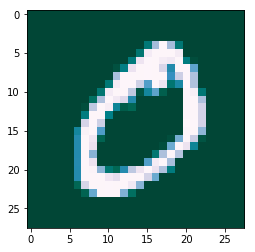

In [5]:
#coding: utf-8 
from keras.datasets import mnist
import matplotlib.pyplot as plt
# 加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 展示下第一张图
# plt.imshow(X_train[0], cmap=plt.get_cmap('PuBuGn_r'))
# plt.imshow(X_train[2], cmap=plt.get_cmap('PuBuGn_r'))
# print (X_train[1])
# print (len(y_train))
# print (type(y_train))
print (X_train[1])
# print (X_train.ndim)
# print ((X_train).size)
plt.imshow(X_train[1], cmap=plt.get_cmap('PuBuGn_r'))
plt.show()



In [1]:
#coding: utf-8 #Simple CNN (代码测试通过)
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils


seed = 7
numpy.random.seed(seed)

#加载数据
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')

# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255 
X_test = X_test / 255 # one hot encode outputs 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 简单的CNN模型
def baseline_model():
    # create model 
    model = Sequential()
    #卷积层
    model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(28, 28,1), activation='relu')) #池化层
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #卷积
    model.add(Conv2D(15, (3, 3), padding='valid' ,activation='relu')) #池化
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #全连接，然后输出
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax')) # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model 
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128, verbose=2)

Using TensorFlow backend.


ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (60000, 28, 28)

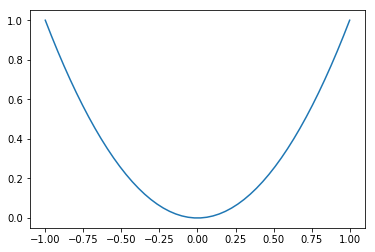

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,1,50)
# y = 2*x+1
y = x**2
plt.plot(x,y)
plt.show()

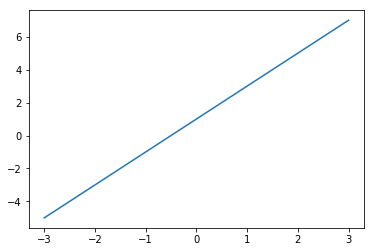

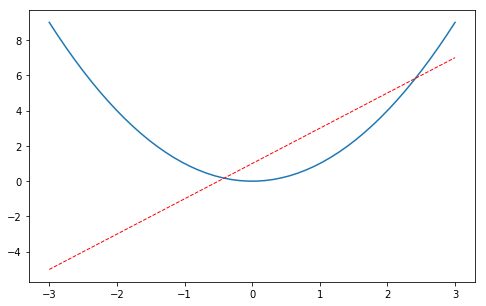

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()
plt.plot(x,y1)

plt.figure(num=3,figsize=(8,5))
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')
plt.show()

[-1.   -0.25  0.5   1.25  2.  ]


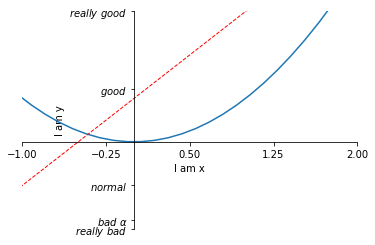

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--')

plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am x')
plt.ylabel('I am y')

new_ticks = np.linspace(-1,2,5)
print (new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],[r'$really \ bad $',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really \ good$'])

##gca = 'get current axis'
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data',0))#outward,axes
ax.spines['left'].set_position(('data',0))

plt.show()

[-1.   -0.25  0.5   1.25  2.  ]


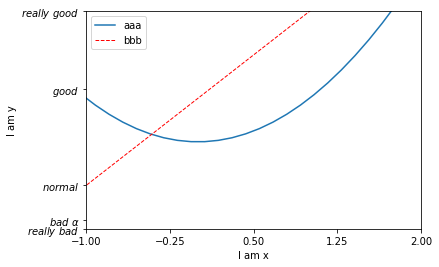

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2

plt.figure()

plt.xlim((-1,2))
plt.ylim((-2,3))
plt.xlabel('I am x')
plt.ylabel('I am y')

new_ticks = np.linspace(-1,2,5)
print (new_ticks)
plt.xticks(new_ticks)
plt.yticks([-2,-1.8,-1,1.22,3],[r'$really \ bad $',r'$bad\ \alpha$',r'$normal$',r'$good$',r'$really \ good$'])


l1,=plt.plot(x,y2,label = 'up')
l2,=plt.plot(x,y1,color='red',linewidth=1.0,linestyle='--',label='down')
plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')

plt.show()

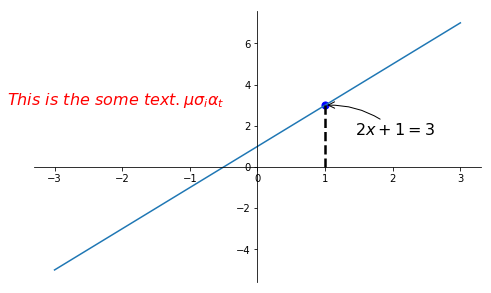

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y = 2*x + 1

plt.figure(num=1,figsize=(8,5),)
plt.plot(x,y,)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

x0 = 1
y0 = 2*x0 + 1
plt.scatter(x0,y0,s=50,color='b')
plt.plot([x0,x0],[y0,0],'k--',lw=2.5)

#method 1
plt.annotate(r'$2x+1=%s$' % y0,xy=(x0,y0),xycoords='data',xytext=(+30,-30),textcoords='offset points',
   fontsize=16,arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2') )

##method 2
plt.text(-3.7,3,r'$This\ is \ the \ some \ text.\mu \sigma_i \alpha_t $',
    fontdict={'size':16,'color':'r'})
plt.show()

In [4]:
##好用！在 Notebook 中使用 Sublime Text 快捷键
from jupyter_core.paths import jupyter_config_dir
jupyter_dir = jupyter_config_dir()
print(jupyter_dir)
import os.path
custom_js_path = os.path.join(jupyter_dir, 'custom', 'custom.js')
print(custom_js_path)

C:\Users\Administrator\.jupyter
C:\Users\Administrator\.jupyter\custom\custom.js


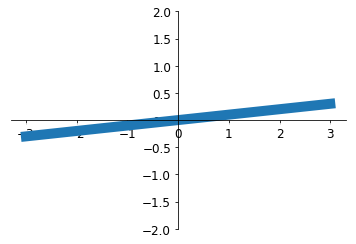

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,50)
y = 0.1*x

plt.figure()
plt.plot(x,y,linewidth=10)
plt.ylim(-2,2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

for label in ax.get_xticklabels()+ax.get_yticklabels():
	label.set_fontsize(12)
	label.set_bbox(dict(facecolor='white',edgecolor='None',alpha=0.7))

plt.show()

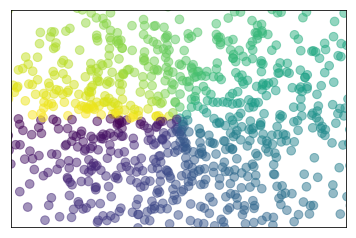

In [17]:
import matplotlib.pyplot as plt
import numpy as np

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)#for color value

# plt.scatter(np.arange(5),np.arange(5))


plt.scatter(X,Y,s=75,c=T,alpha=0.5)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.xticks(())
plt.yticks(())
plt.show()

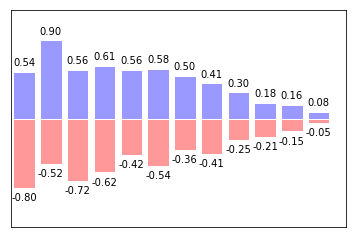

In [34]:
import matplotlib.pyplot as plt
import numpy as np

n = 12
X = np.arange(n)
Y1 = (1-X/float(n))*np.random.uniform(0.5,1,n)
Y2 = (1-X/float(n))*np.random.uniform(0.5,1,n)

# plt.bar(X,Y1,)
# plt.bar(X,-Y2)

plt.bar(X,Y1,facecolor="#9999ff",edgecolor='white')
plt.bar(X,-Y2,facecolor="#ff9999",edgecolor='white')

for x,y in zip(X,Y1):
	plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom')

for x,y in zip(X,Y2):
	plt.text(x,-y-0.05,'-%.2f'% y,ha='center',va='top')


plt.xlim(-.5,n)
plt.xticks(())
plt.ylim((-1.25,1.25))
plt.yticks(())

plt.show()

C:\Users\Administrator\Envs\python4\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


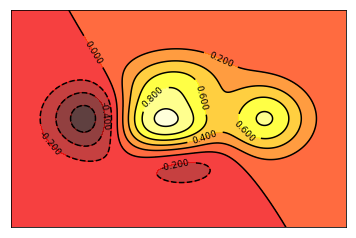

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def f(x,y):
	#the height function
	return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)

X,Y = np.meshgrid(x,y)

##use plt.contourf to filling contours
##X,Y and value for (X,Y) point
plt.contourf(X,Y,f(X,Y),8,alpha=0.75,cmap=plt.cm.hot)

##use plt.contour to add contour lines
C = plt.contour(X,Y,f(X,Y),8,colors='black',linewidth=.5)

##adding label
plt.clabel(C,inline=True,fontsize=9)



plt.xticks(())
plt.yticks(())

plt.show()

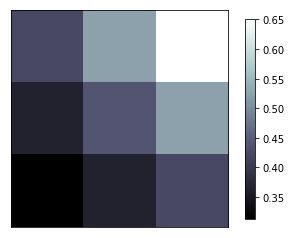

In [38]:
# 13 - image
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
"""

import matplotlib.pyplot as plt
import numpy as np

# image data
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)

"""
for the value of "interpolation", check this:
http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
for the value of "origin"= ['upper', 'lower'], check this:
http://matplotlib.org/examples/pylab_examples/image_origin.html
"""
plt.imshow(a, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

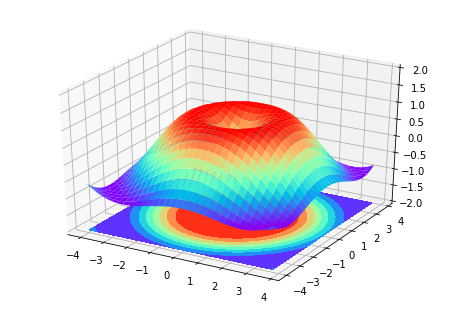

In [39]:
# 14 - 3d
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
Tutorial reference:
http://www.python-course.eu/matplotlib_multiple_figures.php
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
"""
============= ================================================
        Argument      Description
        ============= ================================================
        *X*, *Y*, *Z* Data values as 2D arrays
        *rstride*     Array row stride (step size), defaults to 10
        *cstride*     Array column stride (step size), defaults to 10
        *color*       Color of the surface patches
        *cmap*        A colormap for the surface patches.
        *facecolors*  Face colors for the individual patches
        *norm*        An instance of Normalize to map values to colors
        *vmin*        Minimum value to map
        *vmax*        Maximum value to map
        *shade*       Whether to shade the facecolors
        ============= ================================================
"""

# I think this is different from plt12_contours
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))
"""
==========  ================================================
        Argument    Description
        ==========  ================================================
        *X*, *Y*,   Data values as numpy.arrays
        *Z*
        *zdir*      The direction to use: x, y or z (default)
        *offset*    If specified plot a projection of the filled contour
                    on this position in plane normal to zdir
        ==========  ================================================
"""

ax.set_zlim(-2, 2)

plt.show()


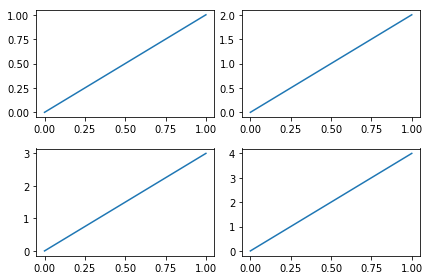

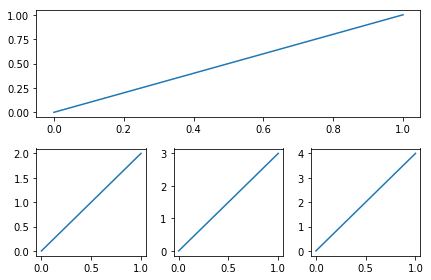

In [40]:
# 15 - subplot
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
Tutorial reference:
http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html
"""

import matplotlib.pyplot as plt

# example 1:
###############################
plt.figure(figsize=(6, 4))
# plt.subplot(n_rows, n_cols, plot_num)
plt.subplot(2, 2, 1)
plt.plot([0, 1], [0, 1])

plt.subplot(222)
plt.plot([0, 1], [0, 2])

plt.subplot(223)
plt.plot([0, 1], [0, 3])

plt.subplot(224)
plt.plot([0, 1], [0, 4])

plt.tight_layout()

# example 2:
###############################
plt.figure(figsize=(6, 4))
# plt.subplot(n_rows, n_cols, plot_num)
plt.subplot(2, 1, 1)
# figure splits into 2 rows, 1 col, plot to the 1st sub-fig
plt.plot([0, 1], [0, 1])

plt.subplot(234)
# figure splits into 2 rows, 3 col, plot to the 4th sub-fig
plt.plot([0, 1], [0, 2])

plt.subplot(235)
# figure splits into 2 rows, 3 col, plot to the 5th sub-fig
plt.plot([0, 1], [0, 3])

plt.subplot(236)
# figure splits into 2 rows, 3 col, plot to the 6th sub-fig
plt.plot([0, 1], [0, 4])


plt.tight_layout()
plt.show()

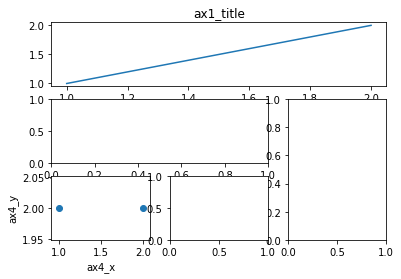

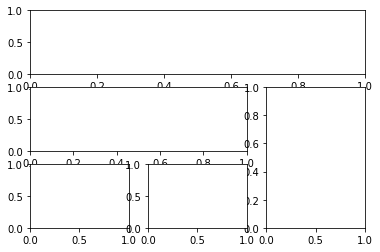

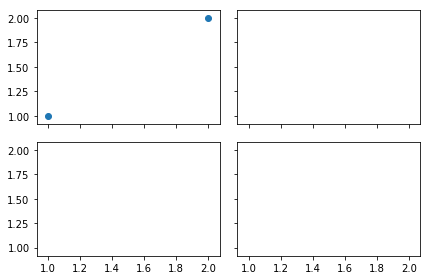

In [41]:
# 16 - grid
"""
Please note, this script is for python3+.
If you are using python2+, please modify it accordingly.
Tutorial reference:
http://matplotlib.org/users/gridspec.html
"""

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# method 1: subplot2grid
##########################
plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)  # stands for axes
ax1.plot([1, 2], [1, 2])
ax1.set_title('ax1_title')
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.scatter([1, 2], [2, 2])
ax4.set_xlabel('ax4_x')
ax4.set_ylabel('ax4_y')
ax5 = plt.subplot2grid((3, 3), (2, 1))

# method 2: gridspec
#########################
plt.figure()
gs = gridspec.GridSpec(3, 3)
# use index from 0
ax6 = plt.subplot(gs[0, :])
ax7 = plt.subplot(gs[1, :2])
ax8 = plt.subplot(gs[1:, 2])
ax9 = plt.subplot(gs[-1, 0])
ax10 = plt.subplot(gs[-1, -2])

# method 3: easy to define structure
####################################
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)
ax11.scatter([1,2], [1,2])

plt.tight_layout()
plt.show()